In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML

display(HTML(
    '<style>'
        '#notebook { padding-top: 0px !important; } ' 
        '.container { width: 100% !important; } '
        '.end_space { min-height: 0px !important; } '
        'table, tr, td { border: 1px  black solid !important; color: black; }'
        'th { border: 1px  black solid !important; color: #130f40; background: #ECFED7; }'
    '</style>'
))

In [2]:
uber_15 = pd.read_csv(r'../../000_Datasets/Datasets_Uber_NY/uber-raw-data-janjune-15.csv', encoding='utf-8')

In [3]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format ='%Y-%m-%d %H:%M:%S')

In [4]:
display(uber_15)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [5]:
## getting count of total duplicated observations in your data
uber_15.duplicated().sum()

898225

# Which month have max. Uber pickups in New York City ?

In [6]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format ='%Y-%m-%d %H:%M:%S' )

In [7]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [8]:
## extracting month from 'Pickup_date'..
uber_15['month']=uber_15['Pickup_date'].dt.month

<AxesSubplot:>

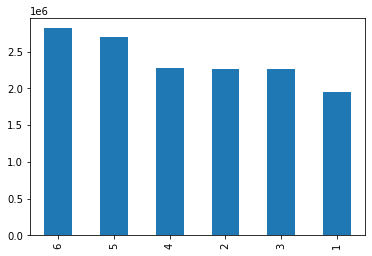

In [9]:
uber_15['month'].value_counts().plot(kind='bar')

# Lets find out total trips for each month & each weekdays

In [10]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [11]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [12]:
temp=uber_15.groupby(['month','weekday'],as_index=False).size()
temp.head()

,month,weekday,size
0,1,Friday,345532
1,1,Monday,194004
2,1,Saturday,392900
3,1,Sunday,234599
4,1,Thursday,336532


In [13]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [14]:
dict_month={1:'Jan', 2:'Feb', 3:'March', 4:'april', 5:'May', 6:'June'}

In [15]:
temp['month']=temp['month'].map(dict_month)

In [16]:
temp['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    april
22    april
23    april
24    april
25    april
26    april
27    april
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: month, dtype: object

<AxesSubplot:xlabel='month', ylabel='size'>

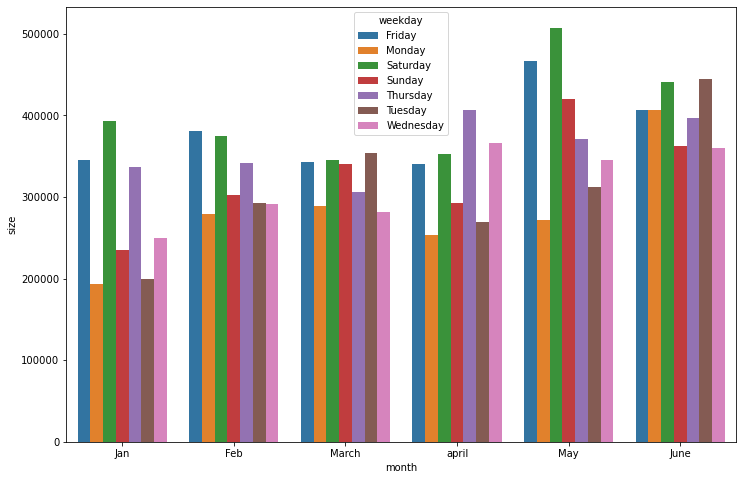

In [17]:
## create grouped bar chart ..

plt.figure(figsize=(12,8))
sns.barplot(x='month',y='size',hue='weekday',data=temp)

# Lets find out hourly rush in New york city on all days

In [18]:
summary=uber_15.groupby(['weekday','hour'],as_index=False).size()

In [19]:
display(summary)

,weekday,hour,size
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


<AxesSubplot:xlabel='hour', ylabel='size'>

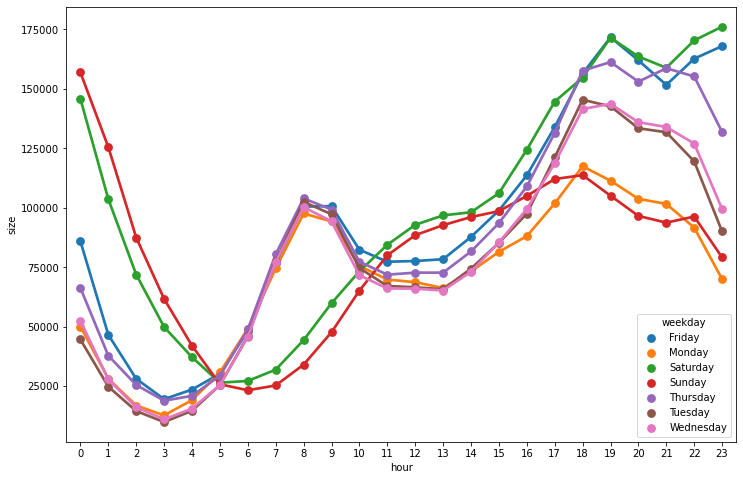

In [20]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)

# Which base_number has most number of active vehicles ??

In [21]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [22]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs ,plot ,iplot ,init_notebook_mode
init_notebook_mode(connected=True)